# Pre-processing of TrainDataset2024.xls

In [7]:
#GENERAL IMPORTS
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data ingestion & inital setup

* Data ingestion 
* Identification of discrete features
* Removal of ID as a feature
* Removal of entries with no 'pCR (outcome)'

In [8]:

discrete_features = ['ER', 'PgR', 'HER2', 'TrippleNegative',
                     'ChemoGrade', 'Proliferation', 'HistologyType', 
                     'LNStatus', 'TumourStage', 'Gene']

#load data, remove ID values, and replace 999's with np.nan
data = pd.read_excel('TrainDataset2024.xls')
data.drop('ID', inplace=True, axis=1)
data.replace(999, np.nan, inplace=True)
data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,395.000000,400.000000,400.000000,400.000000,399.000000,399.000000,399.000000,397.000000,398.000000,397.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.212658,56.000208,51.804674,0.547500,0.406015,0.300752,0.333333,2.400504,1.575377,1.148615,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,0.409707,27.137584,10.948522,0.498362,0.491704,0.459161,0.471996,0.500807,0.766487,0.356157,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,1.000000,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [9]:
#pCR (outcome) has missing values but RFS does not
#drop any rows in which pCR (outcome) is missing

data = data[~data['pCR (outcome)'].isna()]
print(*data.isna().sum())

0 0 0 0 1 1 1 3 2 3 1 0 85 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


# Data imputation

* Missing data investigation
* Data imputation for discrete values, as there are no missing values for continuous features
* Check data has been sucessfully imputed

In [10]:
#according to the inspection above, only the discrete features have missing values 
#as we are replacing discrete features it's important to choose an imputation method that keeps the 
#values discrete
#below the nan values have been changed to the median of there feature based on groups made up by the output 

#KNN imputation does not keep values discrete for instance the case of gene it creates the values 0, 0.2, 0.4, 0.6, 0.8 and 1
#where as we need just 0 and 1 

groups = data.groupby('pCR (outcome)')
for column in data: 
    data[column] = groups[column].transform(lambda x: x.fillna(x.median()))
print(*data.isna().sum())


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


# Z-test for outliers and mitigation

Z-tests evaluate outliers in data. Here we mitigate for these outliers. 
* Remove rows in which RelapseFreeSurvival (outcome) is beyond a z-test threshold
* Replace all values which are beyond μ±3σ with ±3σ, for each dataset. 

In [11]:
#the following 2 cells use a z-test to see if any values are statistically unlikely to be relevant 
#if a value fails this z-test then it is replaced by the feature median 

#drop any instaces with outliers in RelapseFreeSurvival (outcome) as these will greatly affect accuracy 
#not needed for pCR (outcome) as this is binary and represents a class and therefore deos not have outliers 

threshold = 3 
median = data['RelapseFreeSurvival (outcome)'].median()
mean = data['RelapseFreeSurvival (outcome)'].mean()
std = data['RelapseFreeSurvival (outcome)'].std()

indices = []

for index, value in data['RelapseFreeSurvival (outcome)'].items():
    z_test = (value - mean) / std 
    if np.abs(z_test) > threshold: 
        indices.append(index) 
        
for index in indices: 
    data.drop(index, inplace=True)
        
data.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,...,3.900000e+02,3.900000e+02,3.900000e+02,390.000000,3.900000e+02,390.000000,390.000000,390.000000,390.000000,390.000000
mean,0.212821,54.612607,51.882999,0.553846,0.407692,0.302564,0.328205,2.392308,1.566667,1.146154,...,3.937734e-01,3.893549e-01,2.719453e+00,0.003307,5.818217e+07,180.351242,33333.366589,0.056834,0.005952,0.029898
std,0.409828,25.424938,11.046085,0.497731,0.492037,0.459958,0.470163,0.499298,0.761825,0.353714,...,1.677657e-01,1.626979e-01,7.721641e-01,0.002422,7.153526e+08,1058.517323,179736.066152,0.046937,0.008339,0.117335
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.334702,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.182408e-01,3.154970e-01,2.325559e+00,0.001303,1.037248e+06,18.686784,0.001811,0.018521,0.000307,0.001448
50%,0.000000,54.708333,51.242984,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.067794e-01,4.046406e-01,2.816128e+00,0.002888,3.421333e+06,69.581762,0.004350,0.047889,0.002337,0.003178
75%,0.000000,72.583333,60.225000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,4.967821e-01,4.921134e-01,3.304834e+00,0.004738,9.302651e+06,158.926272,0.013775,0.085482,0.008007,0.009530
max,1.000000,135.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [12]:
#using z score to calculate expectable limits for each feature
#replacing outliers with the limit 
#inter quartile range was tested however it proved to be too sensitive and replaced too many instances 

def set_outliers_to_z_score_limit(series): 
    
    # Exclude target features
    outcomes = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)']
    if series.name in outcomes:
        return series
    
    threshold_upper = 3 
    threshold_lower = -3
    
    mean = series.mean()
    std = series.std()
    
    replacement_upper_limit = (3 * std) + mean
    replacement_lower_limit = (-3 * std) + mean
    
    outlier_count= 0 
    for index, value in series.items():
        z_test = (value - mean) / std 
        
        if z_test > threshold_upper: 
            series[index] = replacement_upper_limit
            outlier_count+=1
            
        elif z_test < threshold_lower:
            series[index] = replacement_lower_limit
            outlier_count+=1
        
    if outlier_count > 0:
        print(f'column {series.name} had {outlier_count} outliers')
                 
    return series

# Discrete data is not affected by this function, so all features can be run through. 
data.apply(set_outliers_to_z_score_limit, axis=0)

column original_shape_Elongation had 3 outliers
column original_shape_LeastAxisLength had 4 outliers
column original_shape_MajorAxisLength had 6 outliers
column original_shape_Maximum2DDiameterColumn had 6 outliers
column original_shape_Maximum2DDiameterRow had 6 outliers
column original_shape_Maximum2DDiameterSlice had 7 outliers
column original_shape_Maximum3DDiameter had 7 outliers
column original_shape_MeshVolume had 6 outliers
column original_shape_MinorAxisLength had 4 outliers
column original_shape_SurfaceArea had 4 outliers
column original_shape_SurfaceVolumeRatio had 4 outliers
column original_shape_VoxelVolume had 6 outliers
column original_firstorder_10Percentile had 3 outliers
column original_firstorder_90Percentile had 8 outliers
column original_firstorder_Energy had 2 outliers
column original_firstorder_InterquartileRange had 6 outliers
column original_firstorder_Kurtosis had 4 outliers
column original_firstorder_Maximum had 8 outliers
column original_firstorder_MeanAbsol

/var/folders/sc/s5l9bfs166l8kkt0npztsmsm0000gn/T/ipykernel_85336/1571957873.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '123894.86934059348' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  series[index] = replacement_upper_limit


,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
2,1.0,135.000000,31.0,0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,0.0,12.000000,35.0,0,0.0,0.0,1.0,3.0,3.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,0.0,109.000000,61.0,1,0.0,0.0,0.0,2.0,1.0,1.0,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
5,0.0,135.000000,49.0,0,0.0,0.0,1.0,3.0,3.0,1.0,...,0.532369,0.532369,2.661106,0.007079,1.795207e+06,101.316642,0.002652,0.053378,0.002770,0.002263
7,0.0,17.000000,41.0,0,0.0,0.0,1.0,3.0,2.0,1.0,...,0.476326,0.476326,3.099632,0.008650,1.032117e+06,96.947959,0.002821,0.069697,0.004285,0.002475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,54.500000,58.5,1,0.0,1.0,0.0,3.0,2.0,1.0,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,0.0,49.250000,34.3,0,0.0,0.0,1.0,3.0,3.0,1.0,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,0.0,48.500000,53.3,0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,0.0,47.500000,68.8,1,0.0,0.0,0.0,3.0,3.0,1.0,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


# Scaling data

Scaling is the act of standardising continuous data about a mean, μ = 0, and a standard deviation, σ = 1. This allows for data to be effectively compared. 
* Drop outcomes, pCR (outcome) and RelapseFreeSurivial (outcome), and discrete data types.
* Application of StandardScaler from sklearn. 
* Recombine dropped data for 

In [13]:
from sklearn.preprocessing import StandardScaler

#drop outcomes and discrete data
dropped_features = ['pCR (outcome)', 'RelapseFreeSurvival (outcome)', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'Gene']
continous_data = data.drop(columns=dropped_features, axis=1)

# Apply StandardScaler only to continuous variables
scaler = StandardScaler()
fitted_scaler = scaler.fit(continous_data)
continuous_scaled = fitted_scaler.transform(continous_data)

# Recombine data
continuous_scaled_df = pd.DataFrame(continuous_scaled, columns=continous_data.columns)
discrete_data = data[dropped_features]
scaled_data = pd.concat([discrete_data.reset_index(drop=True), continuous_scaled_df.reset_index(drop=True)], axis=1)

In [14]:
# One-hot encode the categorical variables
processed_data = pd.get_dummies(scaled_data, columns=discrete_features)

# Display the first few rows to verify the changes
processed_data.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,HistologyType_1.0,HistologyType_2.0,LNStatus_0.0,LNStatus_1.0,TumourStage_1,TumourStage_2,TumourStage_3,TumourStage_4,Gene_0.0,Gene_1.0
0,1.0,135.0,-1.892963,-0.437862,0.267381,-0.140682,-0.403013,-0.637617,-0.166632,-0.192642,...,True,False,True,False,False,True,False,False,False,True
1,0.0,12.0,-1.530378,0.333764,-0.279687,0.397379,0.268021,0.813685,0.039864,0.826795,...,True,False,False,True,False,False,True,False,False,True
2,0.0,109.0,0.826421,0.887163,1.181468,-0.271987,-0.773350,-0.626636,-0.619094,-0.652343,...,True,False,True,False,False,True,False,False,False,True
3,0.0,135.0,-0.261333,1.422510,1.600698,0.264026,-0.627688,-0.437775,-0.354359,-0.381809,...,True,False,False,True,False,False,True,False,False,True
4,0.0,17.0,-0.986501,1.441590,1.667782,-0.001525,-0.762760,-0.631148,-0.522597,-0.569057,...,True,False,False,True,False,True,False,False,False,True


In [15]:
#seperate the two data sets
classification = processed_data.drop(columns='RelapseFreeSurvival (outcome)')
print(*classification.isna().sum())

regression = processed_data.drop(columns='pCR (outcome)')
print(*regression.isna().sum())

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


# Importance and Correlation sorting

Features can be removed based on their value in the training process. 
* Correlation - individual features correlated against the outcomes
* Importance - importance of features in training the ml model
* Plotting of the data
* Removal of values outside a set range

In [16]:
#Correlation correlation
correlation_matrix_classification_abs = abs(classification.corr())
pcr_corr = correlation_matrix_classification_abs['pCR (outcome)']
pcr_corr = pcr_corr.sort_values(ascending=False)
pcr_corr.drop('pCR (outcome)', inplace=True)

In [17]:
#Regression correlation
correlation_matrix_regression_abs = abs(regression.corr())
rfs_corr = correlation_matrix_regression_abs['RelapseFreeSurvival (outcome)']
rfs_corr = rfs_corr.sort_values(ascending=False)
rfs_corr.drop('RelapseFreeSurvival (outcome)', inplace=True)

In [18]:
#Classification importance
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

x_classification = classification.drop(columns='pCR (outcome)')
y_classification = classification['pCR (outcome)']

clf = RandomForestClassifier(random_state=42)
clf.fit(x_classification, y_classification)
importances_clf = clf.feature_importances_

pcr_imp = pd.DataFrame({
    'Feature': x_classification.columns,
    'Importance': importances_clf
}).sort_values(by='Importance', ascending=False)
pcr_imp.reset_index(drop=True, inplace=True)

In [19]:
#Regression Importance

x_regression = regression.drop(columns='RelapseFreeSurvival (outcome)')
y_regression = regression['RelapseFreeSurvival (outcome)']

rf = RandomForestRegressor(random_state=42)
rf.fit(x_regression, y_regression)
importances_rf = rf.feature_importances_

rfs_imp = pd.DataFrame({
    'Feature': x_regression.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)
rfs_imp.reset_index(drop=True, inplace=True)

In [20]:
# High defines absolute cut off
# Low defines cut off if alternative value is also Low,
#   (e.g., pcr_imp_low and pcr_coll_low)

pcr_imp_high  = 0.003
pcr_imp_low   = 0.002

rfs_imp_high  = 0.003
rfs_imp_low   = 0.002

pcr_corr_high = 0.04
pcr_corr_low  = 0.025

rfs_corr_high = 0.02
rfs_corr_low  = 0.01

In [22]:
for column in x_classification:
    if pcr_imp[pcr_imp['Feature'] == column]['Importance'].values[0] < pcr_imp_high and pcr_corr[column] < pcr_corr_high:
        x_classification.drop(columns=[column], inplace=True)
    elif pcr_imp[pcr_imp['Feature'] == column]['Importance'].values[0] < pcr_imp_low or pcr_corr[column] < pcr_corr_low:
        x_classification.drop(columns=[column], inplace=True)
        
for column in x_regression:
    if rfs_imp[rfs_imp['Feature'] == column]['Importance'].values[0] < rfs_imp_high and rfs_corr[column] < rfs_corr_high:
        x_regression.drop(columns=[column], inplace=True)
    elif rfs_imp[rfs_imp['Feature'] == column]['Importance'].values[0] < rfs_imp_low or rfs_corr[column] < rfs_corr_low:
        x_regression.drop(columns=[column], inplace=True)

print('x_regression shape:', x_regression.shape)
print('x_classification shape:', x_classification.shape)

x_regression shape: (390, 80)
x_classification shape: (390, 110)


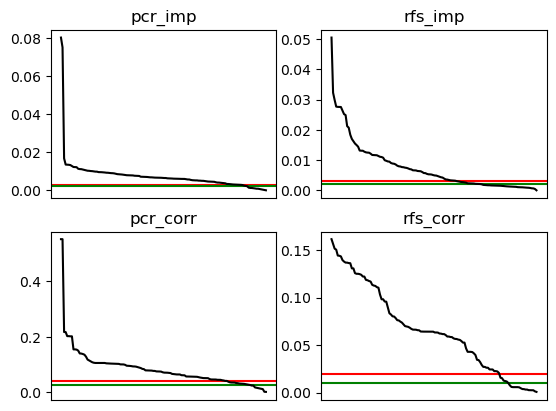

In [21]:
figure, axis = plt.subplots(2,2)

axis[0,0].axhline(y = pcr_imp_high, color='r')
axis[0,0].axhline(y = pcr_imp_low, color='g')
axis[0,0].plot(pcr_imp["Importance"], color='black')
axis[0,0].set_title('pcr_imp')
axis[0,0].get_xaxis().set_visible(False)

axis[0,1].axhline(y = rfs_imp_high, color='r')
axis[0,1].axhline(y = rfs_imp_low, color='g')
axis[0,1].plot(rfs_imp["Importance"], color='black')
axis[0,1].set_title('rfs_imp')
axis[0,1].get_xaxis().set_visible(False)

axis[1,0].axhline(y = pcr_corr_high, color='r')
axis[1,0].axhline(y = pcr_corr_low, color='g')
axis[1,0].plot(pcr_corr, color='black')
axis[1,0].set_title('pcr_corr')
axis[1,0].get_xaxis().set_visible(False)

axis[1,1].axhline(y = rfs_corr_high, color='r')
axis[1,1].axhline(y = rfs_corr_low, color='g')
axis[1,1].plot(rfs_corr, color='black')
axis[1,1].set_title('rfs_corr')
axis[1,1].get_xaxis().set_visible(False)

# Exporting data

In [23]:
#save the new features to csv format 

x_classification.to_csv('x_classification_feature_test.csv')
y_classification.to_csv('y_classification_feature_test.csv')

x_regression.to_csv('x_regression_feature_test.csv')
y_regression.to_csv('y_regression_feature_test.csv')